# Tagging Comparisons

Goal: Create a graph comparing the results of the ML Pipeline vs. Human annotations.

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import json
import glob
import os

In [12]:
def loadJSON(path):
    with open(path, 'r') as file:
        data = json.load(file)
    return len(data)

def loadCSV(path, delim=' '):
    data = np.loadtxt(path, delimiter=delim)
    return len(data)

In [59]:
def plotValues(csvDir, jsonDir,title):
    csvData = np.empty([0,2])
    for file in sorted(glob.glob(csvDir)):
        num = loadCSV(file)
        time = os.path.basename(file).split('_')[-1].split('.')[0]
        csvData = np.vstack([csvData,[time,num]])

    jsonData = np.empty([0,2])
    for file in sorted(glob.glob(jsonDir)):
        num = loadJSON(file)
        time = os.path.basename(file).split('_')[-1].split('.')[0]
        jsonData = np.vstack([jsonData,[time,num]])

    csvData = csvData.astype(int)
    jsonData = jsonData.astype(int)
    line1, = plt.plot(csvData[:,0],csvData[:,1],'orange', label="Human-Stian")
    line2, = plt.plot(jsonData[:,0],jsonData[:,1],'b', label="Machine")
    plt.legend(handles=[line1,line2], loc='upper right')
    plt.title(title)
    plt.show()

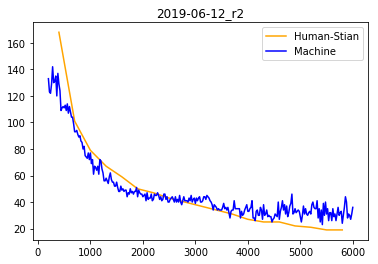

In [60]:
csvDir = '/home/stian/Desktop/testVid/MLCSV/*.dat'
jsonDir = '/home/stian/Desktop/testVid/corrected/outIMG/*.json'
title = "2019-06-12_r2"
plotValues(csvDir, jsonDir, title)
